# 1. Code explaining lab_1.py 
## 1.1 faza testów 02.10.2024 22:99

Przed eksperymentem sprawdzałem model na danych losowych, liczyło się dla mnie jedynie czy  model działa (uruchamia się) i czy 'coś' z niego wychodzi. ![zdjęcie 1](image1.png) to był wykres dany po wylosowaniu 1szego zestawu danych.
```python
# Generowanie losowych danych
np.random.seed(42)  # Ustawienie ziarna losowości
num_samples = 1000 # Liczba próbek

# Generowanie losowych temperatur (270-400K) i zmian objętości (0.1-1.0)
temperatures = np.random.uniform(270, 400, num_samples)
delta_volumes = np.random.uniform(0.1, 1.0, num_samples)
```
wszystko bazowało na całkowicie losowych danych niezgodnych z realnymi pomiarami wiec nie ma co sie dziwić ze otrzymane informacje nie pozwalały na stwierdzenie niczego wiecej jak "no działa". 
![zdjęcie 2](image2.png)



# 2. Mój kod. 
Na tym etapie będe tłumaczył krok po kroku jak zbudowany jest mój kod i w jaki sposób będe go wykoprzystywał. Staram się by było jak naprościej ale jestem świadomy że jakaś minimalna wiedza z programowania w python jest potrzebna 
## 2.1 Import bibliotek

In [61]:
import os
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns

Tutaj jedynie przywołujemy najpotrzebniejsze biblioteki i zapisujemy je w po przywołaniu w kodzie nie musieć pisać całych nazw a jedynie skróty tj. `nn`, `pd` itd. 

## 2.2 Importowanie danych z pliku xlsx
Obok zapisu `.csv`, `.xlsx` jest podstawowym i standardowym zapisem plików excel. Ale w przeciwieństwie do `.csv` możemy importować wartości z kolumn (np.temperature) a nie musimy zapisywać danych w jednej kolumn i oddzielać jej przecinkami tak jak by muisiało to być w pliku `.csv`. 



In [62]:
# 0. Otwieranie danych
file_path = 'lab_1_dane.xlsx'
# Sprawdzenie, czy plik istnieje
if os.path.exists(file_path):
    # odczytanie danych z arkusza 
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    print(df.head())
else:
    print(f"Plik {file_path} nie istnieje. Upewnij się, że plik znajduje się w odpowiednim folderze.")


   temperature  delta_volume
0  -100.000000     -2.059941
1   -97.979798     -1.945419
2   -95.959596     -1.918348
3   -93.939394     -1.817556
4   -91.919192     -1.836924


Nie ma tu dużo do tłumacznia ale i tak postaram się zapisać najważniejsze informacje tak dla przypomnienia ;). 
- `file_path` - zapisujemy ścieżkę naszego pliku z którego bierzemy dane. Ważne że gdy plik znajduje się w tym samym folderze co kod, nie musimy niż więcej dopisywać po za nazwą. 
- tutaj wykonujemy polecenie by program sprawdził czy dany plik w danym miejscu istnieje
    ```python
    if os.path.exists(file_path):
    ```

    - Jeśli plik został znaleziony, sprawdzamy czy dane zostaly wczytane poprawnie. do tego używamy `.head()` ta funkcja wyciąga 5 pierwszym elementów z naszego pliku. 
        ```python
        df = pd.read_excel(file_path, sheet_name='Sheet1')
        # w zmiennej df zapisujemy nasze informacje z pliku `lab_1_dane.xlsx`
        print(df.head())
        ```
    - Jeśli plik nie został znaleziony wyskoczy nam informacje zwrotna:
        ```python
        else:
        print(f"Plik {file_path} nie istnieje. Upewnij się, że plik znajduje się w odpowiednim folderze.")
        ```

## 2.3 Zapisywanie danych jako zmienne i ich konwersja na tensory. 
Teraz jak już mamy otworzone dane w zmiennej możemy rozdzielić je na wynyki pomiaru tempreatury z kolumny `temperature` i zmiany objętości z kolumny `delta_volume`. 
### 2.3.1 Wyciąganie danych

In [63]:
# Przykładowe dane: temperatury (T) i odpowiadające im zmiany objętości (delta_V)
temperatures = df['temperature'].values  # Temperatura w Kelvinach
delta_volumes = df['delta_volume'].values  # Zmiana objętości



Przykładowo w zmiennej `temperatures` chcemny zapisać pomiary temperatury które aktualnie znajdują się w zmiennej `df` by to zrobić musimy wskazać jak się nazywa kolumna pod którą są szukane przez nas wartości. 
W tym przypadku jest to `temperatures` więc całość kodu wygląda następująco
```python
nasza_nowa_zmienna = zmienna_z_wszyskim['nazwa_szukanej_kolumny'].values 
#bo potrzebujemy wartości z tej kolumny. 
```

```python
temperatures = df['temperature'].values  # Temperatura w Kelvinach
```

I analogicznie lecimy dalej w celu "wyciągniecia" wszystkich potrzebnych przez nas informacji. 




### 2.3.2 Zapisywanie danych jako tensory. 
By użyć biblioteki `pytorch` do budowania modelu sieci neuronowej. Najpierw sobie trzeba wytłumaczyć "po co to komu ten tensor?"





#### 2.3.2.BONUS  po co to komu ten tensor?
Tensor to wielowymiarowa tablica danych, która jest uogólnieniem skalara, wektora i macierzy, taka macierz 3d (ale może mieć więcej niż 3 wymiary.)


Przykłady tensorów:
- Skalar: Tensor zerowego rzędu, pojedyncza liczba. $x \in \mathbb{R}$
- Wektor: Tensor pierwszego rzędu, jednowymiarowa tablica. $\mathbf{x} \in \mathbb{R}^n$ 
- Macierz: Tensor drugiego rzędu, dwuwymiarowa tablica. $\mathbf{X} \in \mathbb{R}^{m \times n}$ 
- Tensor wyższego rzędu: Wielowymiarowa tablica.  $\mathcal{X} \in \mathbb{R}^{d_1 \times d_2 \times \ldots \times d_k}$ 

```python
import torch
# Skalar
scalar = torch.tensor(3.14)
# Wektor
vector = torch.tensor([1.0, 2.0, 3.0])
# Macierz
matrix = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
# Tensor trzeciego rzędu
tensor = torch.tensor([[[1.0, 2.0], [3.0, 4.0]], [[5.0, 6.0], [7.0, 8.0]]])
print("Scalar:", scalar)
print("Vector:", vector)
print("Matrix:", matrix)
print("Tensor:", tensor)
```

**Dlaczego tensory są ważne?**
- **Wielowymiarowość:** Tensory mogą reprezentować dane w wielu wymiarach, co jest kluczowe w modelowaniu złożonych struktur danych.
- **Operacje algebraiczne:** Tensory umożliwiają wykonywanie operacji algebraicznych, takich jak iloczyn tensorowy, które są fundamentalne w algorytmach uczenia maszynowego.
    - Iloczyn tensorowy dwóch tensorów 

        $(\mathcal{A} \in \mathbb{R}^{I \times J} ) i ( \mathcal{B} \in \mathbb{R}^{J \times K})$ 
        
        $ \mathcal{C}{ik} = \sum{j=1}^{J} \mathcal{A}{ij} \mathcal{B}{jk}$ 

- **Efektywność obliczeniowa:** Biblioteki takie jak TensorFlow i PyTorch są zoptymalizowane do pracy z tensorami, co pozwala na szybkie i efektywne przetwarzanie danych na GPU.
- **Automatyczne różniczkowanie:** Tensory są używane do obliczania gradientów w procesie optymalizacji i minimalizowania błędu predykcji modelu. 
    - Gradient funkcji straty ( L ) względem parametrów ( $\theta$ ): 
     $\nabla_{\theta} L(\theta) = \left( \frac{\partial L}{\partial \theta_1}, \frac{\partial L}{\partial \theta_2}, \ldots, \frac{\partial L}{\partial \theta_n} \right)$ 

In [64]:
# Konwersja danych do tensorów PyTorch
temperatures = torch.tensor(temperatures, dtype=torch.float32).reshape(-1, 1)  # reshaping na kolumnę
delta_volumes = torch.tensor(delta_volumes, dtype=torch.float32).reshape(-1, 1)

Konwersja na tensory:

- `torch.tensor(temperatures, dtype=torch.float32)` tworzy tensor z listy `temperatures` i ustawia typ danych na `float32`.
- `torch.tensor(delta_volumes, dtype=torch.float32)` robi to samo dla `delta_volumes`.

Zmiana kształtu:

`.reshape(-1, 1)` zmienia kształt tensorów na kolumny, gdzie `-1` oznacza, że liczba wierszy zostanie automatycznie dostosowana do liczby elementów.
To pozwala na łatwiejsze operacje na danych w dalszych etapach analizy lub trenowania modeli.

## 2.4 Model sieci neuronowej. 


### 2.4.1 Wyjaśnienie działania modelu sieci neuronowej

**Schemat sieci neuronowej**:

- Wejście (Input Layer): Dane wejściowe, np. obraz 28x28 pikseli.
- Warstwa ukryta (Hidden Layer): Warstwa w pełni połączona (fully connected layer) z funkcją aktywacji `ReLU`.
- Wyjście (Output Layer): Warstwa w pełni połączona z funkcją aktywacji softmax dla klasyfikacji.

```python 
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        # Warstwa w pełni połączona: 28*28 wejść, 128 neuronów w warstwie ukrytej
        self.fc1 = nn.Linear(28*28, 128)
        # Warstwa w pełni połączona: 128 neuronów w warstwie ukrytej, 10 wyjść (klasy)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Spłaszczenie danych wejściowych
        x = x.view(-1, 28*28)
        # Warstwa ukryta z funkcją aktywacji ReLU
        x = F.relu(self.fc1(x))
        # Warstwa wyjściowa z funkcją aktywacji softmax
        x = F.log_softmax(self.fc2(x), dim=1)
        return x
```

- 1. Wejście: Dane wejściowe (np. obraz 28x28 pikseli) są spłaszczane do wektora o długości 784 (28*28).
- 2. Warstwa ukryta: Dane wejściowe są przekazywane do pierwszej warstwy w pełni połączonej (fc1), która ma 128 neuronów. Funkcja aktywacji ReLU (F.relu) jest stosowana, aby wprowadzić nieliniowość.
- 3. Wyjście: Wynik z warstwy ukrytej jest przekazywany do drugiej warstwy w pełni połączonej (fc2), która ma 10 neuronów (po jednym dla każdej klasy). Funkcja aktywacji softmax (`F.log_softmax`) jest stosowana, aby uzyskać prawdopodobieństwa dla każdej klasy.

Użycie: 
```python
model = SimpleNeuralNetwork()
print(model)
```


Jest to model przykładowy, mój model sie lekko różni i teraz wytłumacze jego działanie. 




In [65]:

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1,  10)  # Warstwa ukryta z 10 neuronami
        self.relu = nn.ReLU()  # Funkcja aktywacji ReLU
        self.output = nn.Linear(10, 1)  # Warstwa wyjściowa
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x
    
# Inicjalizacja modelu
model = NeuralNet()




1. **def forward(self, x)**:
forward to funkcja, która przyjmuje dwa argumenty: self (odniesienie do instancji obiektu) i x (TENSOR NASZYCH DANYCH)
2. **x = self.hidden(x)**
Warstwa ukryta: self.hidden to warstwa ukryta w modelu sieci neuronowej. x jest przetwarzane przez tę warstwę, co oznacza, że dane wejściowe są przekształcane przez zestaw wag i funkcję aktywacji(ReLU) tej warstwy.
3. **x = self.relu(x)**
Funkcja aktywacji ReLU: self.relu to funkcja aktywacji ReLU (Rectified Linear Unit).  ReLU przekształca wartości wejściowe, ustawiając wszystkie wartości ujemne na zero, a wartości dodatnie pozostawia bez zmian.
4. **x = self.output(x)**
Warstwa wyjściowa: self.output to warstwa wyjściowa modelu. Przetwarza ona dane wyjściowe z poprzedniej warstwy (ReLU) i generuje ostateczne wyjście (output) modelu.

#### 2.3.1.1 Słownik


1. **ReLU** (*Rectified Linear Unit*) jest funkcją aktywacji używaną w sieciach neuronowych. Funkcja ta jest definiowana jako:
> [ $\text{ReLU}(x) = \max(0, x)$ ] 
 Oznacza to, że wszystkie wartości ujemne są zamieniane na zero, a wartości dodatnie pozostają bez zmian. ReLU wprowadza nieliniowość do modelu, co pozwala sieci neuronowej na uczenie się złożonych wzorców.

2. **Warstwa ukryta** (*Hidden Layer*)
Warstwa ukryta w sieci neuronowej to warstwa neuronów, która znajduje się pomiędzy warstwą wejściową a warstwą wyjściową. Warstwy ukryte przetwarzają dane wejściowe i przekazują je dalej do kolejnych warstw.
    Wprowadzenie warstw ukrytych pozwala sieci na uczenie się bardziej złożonych reprezentacji danych.
![siecneuronowa.png](neuralnet.png)



Przykład kodu: 
```python
self.fc1 = nn.Linear(28*28, 128)
```
`fc1` jest warstwą ukrytą, która przekształca dane wejściowe o wymiarze 784 (28x28 pikseli) na 128 neuronów. Funkcja aktywacji ReLU jest stosowana do wyjścia tej warstwy, aby wprowadzić nieliniowość:

```python 
x = F.relu(self.fc1(x))
```


##  2.5 Funkcja straty  i optymalizowanie jej wartości

### 2.5.1 Funkcja kosztu
Funkcja kosztu MSE (Mean Squared Error) jest jedną z najczęściej używanych funkcji kosztu w uczeniu maszynowym. MSE mierzy średnią kwadratową różnicę między rzeczywistymi wartościami a przewidywanymi wartościami przez model. 

Wzór:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Gdzie:

- ( $n$ ) to liczba próbek.
- ( $y_i$ ) to rzeczywista wartość dla próbki ( $i$ ).
- ( $\hat{y}_i$ ) to przewidywana wartość dla próbki ( $i$ ).



W python istnieje oddzielna komenda na te funkcję i z niej tutaj skorzystałem. 


In [66]:
f_loss = nn.MSELoss()  # Funkcja straty - błąd średniokwadratowy (MSE)

### 2.5.2 Optymalizator Adam
1. **Optymalizator Adam**(Adaptive Moment Estimation) jest zaawansowanym algorytmem optymalizacji, który łączy zalety dwóch innych popularnych metod: AdaGrad i RMSProp.

Kluczowe cechy optymalizatora Adam:
-  Adaptacyjne współczynniki uczenia się: Adam oblicza indywidualne współczynniki uczenia się dla każdego parametru na podstawie pierwszego i drugiego momentu gradientów (średniej i wariancji).

-  Korekta biasu: Adam wprowadza korekty biasu do momentów, aby zapewnić, że wartości są odpowiednio skalowane, szczególnie na początku treningu.

2. **Wzory matematyczne**

*Aktualizacja pierwszego momentu (średnia gradientów)*: 

$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$  
 
gdzie:

( $m_t$ ) to średnia gradientów w kroku(epoch) ( $t$ ).

( $\beta_1$ ) to współczynnik wygładzania dla średniej gradientów (zwykle ustawiany na $0.9$).

( $g_t$ ) to gradient w kroku ( $t$ ).

*Aktualizacja drugiego momentu (średnia kwadratów gradientów)*:

$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$ 

gdzie:

( $v_t$ ) to średnia kwadratów gradientów w kroku ( t ).
( $\beta_2$ ) to współczynnik wygładzania dla średniej kwadratów gradientów (zwykle ustawiane na 0.999).
Korekta biasu: [ $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$ $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$ 

Aktualizacja parametrów: 

$\theta_t = \theta_{t-1} - \frac{\alpha \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$ 

gdzie:

( $\theta_t$ ) to aktualizowane parametry modelu.

( $\alpha$ ) to współczynnik uczenia się.

( $\epsilon$ ) to mała wartość dodawana do mianownika w celu uniknięcia dzielenia przez zero (zwykle ustawiana na ( $10^{-8}$ )).



In [67]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Optymalizator Adam

## 2.6 Trenowanie modelu 
Tutaj dużo nie ma do pisania, ustawiamy ile podejść bedzie miał nasz model (ilość treningów) i reszta jest trywialna dla osoby potrafiącej czytać kod w python.

In [68]:
# 4. Trenowanie modelu
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass (przekazywanie sygnału)
    outputs = model(temperatures)
    loss = f_loss(outputs, delta_volumes)
    
    # Backward pass i optymalizacja
    optimizer.zero_grad()  # Zerowanie gradientów
    loss.backward()  # Obliczanie gradientów
    optimizer.step()  # Aktualizacja wag

    # Co 50 epok wyświetlamy stratę
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 0.0721
Epoch [100/500], Loss: 0.0190
Epoch [150/500], Loss: 0.0172
Epoch [200/500], Loss: 0.0157
Epoch [250/500], Loss: 0.0145
Epoch [300/500], Loss: 0.0135
Epoch [350/500], Loss: 0.0128
Epoch [400/500], Loss: 0.0122
Epoch [450/500], Loss: 0.0118
Epoch [500/500], Loss: 0.0115


# 3. Tworzenie predykcji dla nowych danych 

In [75]:
# 5. Predykcja dla nowych temperatur
new_temperatures = torch.tensor([-100, 50, 100], dtype=torch.float32).reshape(-1, 1)
predicted_volumes = model(new_temperatures).detach().numpy()

# Wyświetlenie wyników
for i, temp in enumerate(new_temperatures):
    print(f"Przewidywana zmiana objętości dla {temp.item()}K: {predicted_volumes[i][0]:.4f}")

Przewidywana zmiana objętości dla -100.0K: -1.9845
Przewidywana zmiana objętości dla 50.0K: 0.9831
Przewidywana zmiana objętości dla 100.0K: 2.1079


można również zrobic tak by odczytywać dene nowych temperatur z pliku xlsx. to zależy już od nas w tym przypadku wpisałem przykładowe temperatury do macierzy i na ich bazie sprawdziłem czy model działa jak należy

Dziękuję za uwagę

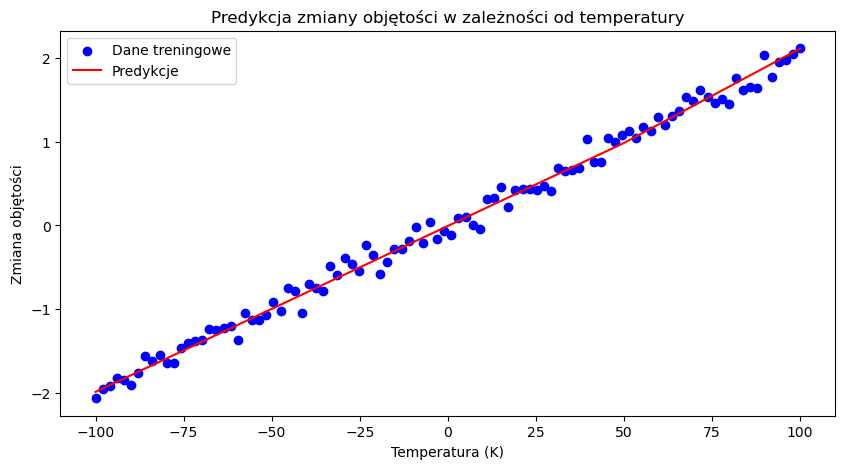

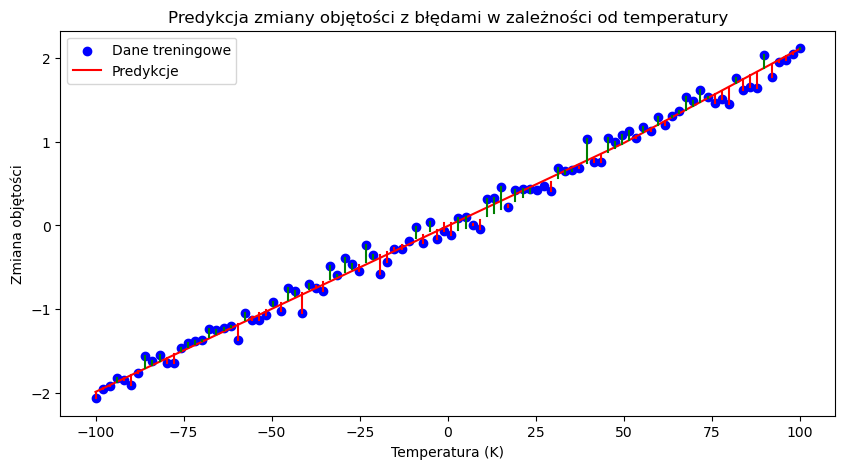

In [76]:
# 6. Wykres wyników
import matplotlib.pyplot as plt

# Wykres danych treningowych i predykcji
plt.figure(figsize=(10, 5))
plt.scatter(temperatures.numpy(), delta_volumes.numpy(), label='Dane treningowe', color='blue')
plt.plot(new_temperatures.numpy(), predicted_volumes, label='Predykcje', color='red')
plt.xlabel('Temperatura (K)')
plt.ylabel('Zmiana objętości')
plt.title('Predykcja zmiany objętości w zależności od temperatury')
plt.legend()
plt.show()

# Obliczanie błędów predykcji
errors = delta_volumes - model(temperatures).detach()
errors = errors.numpy()

# Wykres danych treningowych z błędami
plt.figure(figsize=(10, 5))
plt.scatter(temperatures.numpy(), delta_volumes.numpy(), label='Dane treningowe', color='blue')
plt.plot(new_temperatures.numpy(), predicted_volumes, label='Predykcje', color='red')

# Dodanie błędów do wykresu
for i in range(len(temperatures)):
    color = 'green' if errors[i] >= 0 else 'red'
    plt.plot([temperatures[i], temperatures[i]], [delta_volumes[i], delta_volumes[i] - errors[i]], color=color)

plt.xlabel('Temperatura (K)')
plt.ylabel('Zmiana objętości')
plt.title('Predykcja zmiany objętości z błędami w zależności od temperatury')
plt.legend()
plt.show()
